In [2]:
import os
import shutil
import numpy as np
from sklearn.model_selection import train_test_split

# Define the paths
base_dir = '/Users/tharun/Downloads/PROJECTS/New/Main project/Tyre Quality Ml/Tyre Quality Dataset'
good_dir = os.path.join(base_dir, 'good')
defective_dir = os.path.join(base_dir, 'defective')

train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

# Create directories if they do not exist
for directory in [train_dir, val_dir, test_dir]:
    for category in ['good', 'defective']:
        os.makedirs(os.path.join(directory, category), exist_ok=True)

# Function to split data
def split_data(source, train_dir, val_dir, test_dir, split_train=0.7, split_val=0.15):
    files = [os.path.join(source, f) for f in os.listdir(source) if os.path.isfile(os.path.join(source, f))]
    train_files, temp_files = train_test_split(files, train_size=split_train)
    val_files, test_files = train_test_split(temp_files, test_size=0.5)
    
    for file in train_files:
        shutil.copy(file, os.path.join(train_dir, os.path.basename(file)))
    for file in val_files:
        shutil.copy(file, os.path.join(val_dir, os.path.basename(file)))
    for file in test_files:
        shutil.copy(file, os.path.join(test_dir, os.path.basename(file)))

# Apply the function to both classes
split_data(good_dir, os.path.join(train_dir, 'good'), os.path.join(val_dir, 'good'), os.path.join(test_dir, 'good'))
split_data(defective_dir, os.path.join(train_dir, 'defective'), os.path.join(val_dir, 'defective'), os.path.join(test_dir, 'defective'))

print("Data split into train, validation, and test sets successfully.")


Data split into train, validation, and test sets successfully.


Found 1298 images belonging to 2 classes.
Found 278 images belonging to 2 classes.


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


40/40 ━━━━━━━━━━━━━━━━━━━━ 16s 378ms/step - accuracy: 0.5101 - loss: 0.9201 - val_accuracy: 0.6211 - val_loss: 0.6606
Epoch 2/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6875 - loss: 0.6314 - val_accuracy: 0.7273 - val_loss: 0.5995
Epoch 3/15


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


40/40 ━━━━━━━━━━━━━━━━━━━━ 15s 356ms/step - accuracy: 0.6514 - loss: 0.6237 - val_accuracy: 0.6367 - val_loss: 0.6666
Epoch 4/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7188 - loss: 0.6371 - val_accuracy: 0.5455 - val_loss: 0.7407
Epoch 5/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 14s 347ms/step - accuracy: 0.6999 - loss: 0.5571 - val_accuracy: 0.7031 - val_loss: 0.5739
Epoch 6/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8438 - loss: 0.5875 - val_accuracy: 0.5909 - val_loss: 0.7541
Epoch 7/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 14s 351ms/step - accuracy: 0.7117 - loss: 0.5533 - val_accuracy: 0.6797 - val_loss: 0.5683
Epoch 8/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8438 - loss: 0.5040 - val_accuracy: 0.7273 - val_loss: 0.5547
Epoch 9/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 15s 354ms/step - accuracy: 0.7411 - loss: 0.5258 - val_accuracy: 0.6289 - val_loss: 0.6280
Epoch 10/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6875 - loss: 0.5965 - val_accuracy: 0.6364 - val_los

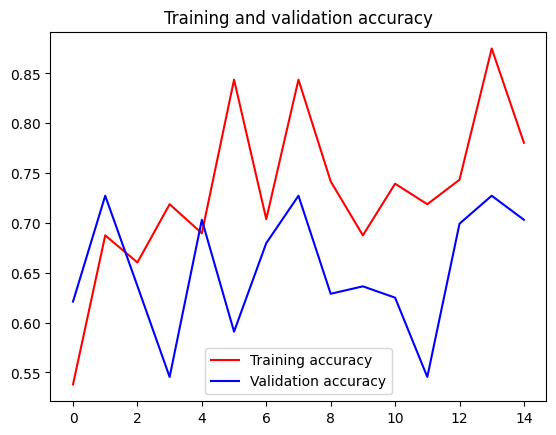

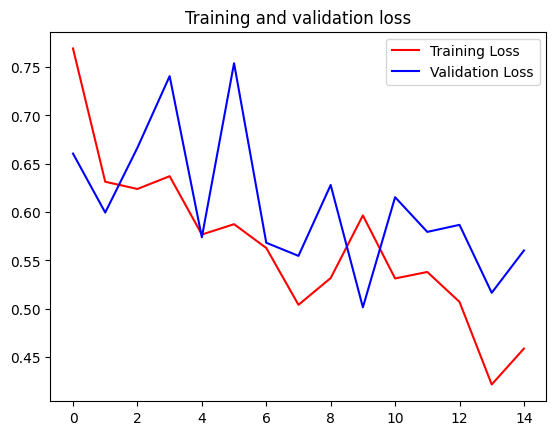

In [5]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths to dataset directories
base_dir = '/Users/tharun/Downloads/PROJECTS/New/Main project/Tyre Quality Ml/Tyre Quality Dataset'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

# Image dimensions
img_width, img_height = 150, 150  # Change as per your image dimensions
batch_size = 32

# Data generators
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

# Model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Use 'sigmoid' for binary classification
])

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=15,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size)

# Evaluate the model
model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)

# Save the model
model.save('/Users/tharun/Downloads/PROJECTS/New/Main project/Tyre Quality Ml.h5')

# Plotting training results
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


Found 280 images belonging to 2 classes.


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step


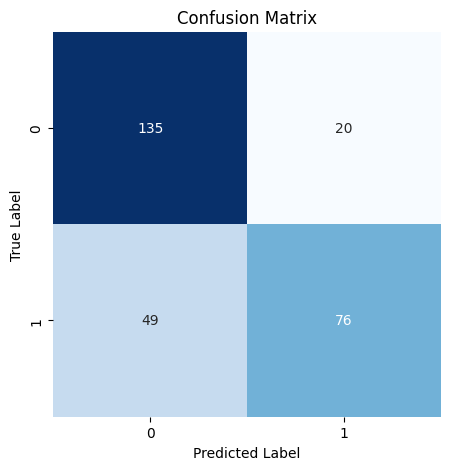

In [7]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the model
model = load_model('/Users/tharun/Downloads/PROJECTS/New/Main project/Tyre Quality Ml.h5')

# Path to test directory
test_dir = '/Users/tharun/Downloads/PROJECTS/New/Main project/Tyre Quality Ml/Tyre Quality Dataset/test'

# Image dimensions
img_width, img_height = 150, 150  # Change as per your image dimensions
batch_size = 32

# Test generator
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False)  # Important: keep data in same order as labels

# Predict classes
predictions = model.predict(test_generator, steps=test_generator.samples // batch_size + 1)
predicted_classes = np.where(predictions > 0.5, 1, 0)

# Get true classes
true_classes = test_generator.classes

# Compute the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes.flatten())

# Plot the confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


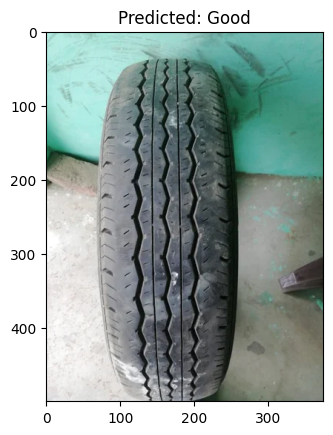

The predicted class is: Good


In [11]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load the model
model_path = '/Users/tharun/Downloads/PROJECTS/New/Main project/Tyre Quality Ml.h5'
model = load_model(model_path)

# Define image path
image_path = '/Users/tharun/Downloads/PROJECTS/New/good-quality-used-or-second-hand-car-tyre-500x500.webp'  # Replace with the path to your image

# Load and preprocess the image
def load_and_preprocess_image(image_path, target_size=(150, 150)):
    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Make batch of one
    img_array /= 255.0  # Rescale the image to 0-1
    return img_array

img = load_and_preprocess_image(image_path)

# Make prediction
prediction = model.predict(img)
predicted_class = 'Good' if prediction[0][0] > 0.5 else 'Defective'

# Show the image and the prediction
plt.imshow(Image.open(image_path))
plt.title(f'Predicted: {predicted_class}')
plt.show()

print(f'The predicted class is: {predicted_class}')
